# =====================PYTHON USE CASE========================

### Data
Data yang digunakan: loan_data.csv

### Link download dataset
https://drive.google.com/file/d/1K6OMDYu6yRdUO65Le1NbRBTNFPsbAX6s/view?usp=sharing


### Submission
- Gunakan Jupyter Notebook
- Tambahkan markdown agar notebook mudah dipahami.
- Nomor soal ditulis dengan jelas menggunakan markdown.
- Isi dengan link github dengan ketentuan nama file: [nama]_finaltest.ipynb
--------

## 1. Tuliskan script untuk import pandas library dan library untuk klasifikasi menggunakan  Tree


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

## 2. Sebutkan setidaknya 2 library untuk fungsi visualisasi di python.





In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

## 3. Import loan_data.csv.








In [130]:
data = pd.read_csv('loan_data.csv')


### Identifikasi tipe data dari masing-masing variable.

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


### Tampilkan 5 baris pertama dan tampilkan informasi summary statistics-nya.

In [137]:
data.head(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [139]:
print('Statistics Summary')
data.describe()

Statistics Summary


,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


## 4. Lakukan pengecekan missing data dan duplicated-row.

### Jika ada, sebutkan kolom apa yang ada missing data.

### Apakah ada duplicated-row?

 



In [7]:
#count how much the percentage of missing value for each field
percentage = pd.DataFrame(round(data.isnull().sum()/len(data)*100,2).sort_values(ascending = False))
percentage

,0
not.fully.paid,0.0
pub.rec,0.0
delinq.2yrs,0.0
inq.last.6mths,0.0
revol.util,0.0
revol.bal,0.0
days.with.cr.line,0.0
fico,0.0
dti,0.0
log.annual.inc,0.0


#### Tidak ada Data Yang missing

### Duplicate Check

In [9]:
data.duplicated().sum()

0

#### Tidak ada data duplikasi dalam data

---------
## 5. Lakukan pengecekan variabel target.



### Ada berapa kategori pada variable target?

In [21]:
data['not.fully.paid'].nunique()

2

### Berapa proporsinya?

In [22]:
round(data['not.fully.paid'].value_counts()/(len(data))*100,2)

0    83.99
1    16.01
Name: not.fully.paid, dtype: float64


### Lakukan visualisasi yang menunjukkan PROPORSI kelas target.

C:\Users\fransd064180\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


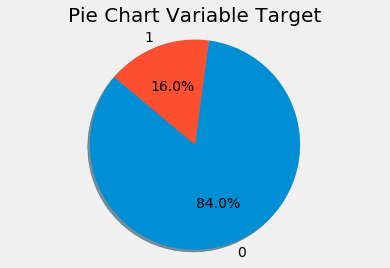

In [68]:
pie=pd.DataFrame(data['not.fully.paid'].value_counts())
pie
# Plot
plt.pie(pie, labels=pie.index,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title('Pie Chart Variable Target',size=20)
plt.show()


## 6. Berapa variansi (ragam) nilai installment?

 



In [30]:
print('Nilai Ragam dari Feature Installment sebesar ',(round(np.var(data['installment']),2)))

Nilai Ragam dari Feature Installment sebesar  42874.05


## 7. Berapa nilai simpangan kuartil pada variable ‘installment’?

 



In [52]:
Q3 = data['installment'].quantile(0.75)  
Q1 = data['installment'].quantile(0.25)
Simpangan_Kuartil = Q3-Q1
print('Simpangan_Kuartil = ', round(Simpangan_Kuartil,2))

Simpangan_Kuartil =  268.99


## 8. Berapa nilai installment tertinggi untuk masing-masing tujuan pinjaman (masing-masing kategori pada variable ‘purpose’)?


In [48]:
data[['installment','purpose']].groupby('purpose').max().sort_values('installment',ascending=False)

,installment
purpose,
debt_consolidation,940.14
small_business,926.83
credit_card,922.42
all_other,916.95
home_improvement,902.06
major_purchase,898.55
educational,861.88


## 9. Variable ‘purpose’ menunjukkan tujuan pengajuan pinjaman.




### Ada berapa kategori pada variable tersebut?

In [54]:
a = data['purpose'].nunique()
print('Ada',a,'Kategori dalam Variable purpose')

Ada 7 Kategori dalam Variable purpose


### Visualisasikan frekuensi pinjaman berdasarkan tujuannya, diurutkan dari frekuensi tertinggi.

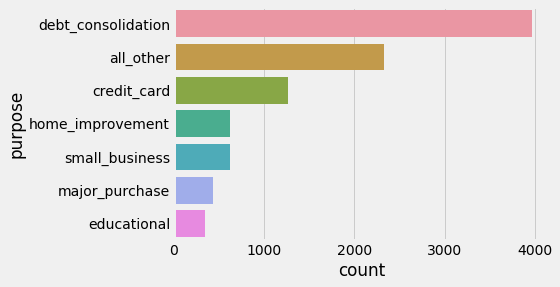

In [69]:
b=pd.DataFrame(data['purpose'].value_counts())
sns.countplot(y=data['purpose'], order=b.index)

## 10. Apakah variable ‘fico’ merupakan predictor yang potensial untuk memprediksi target? Jelaskan argumen anda. Hint: Visualisasikan distribusi ‘fico’ terhadap target.


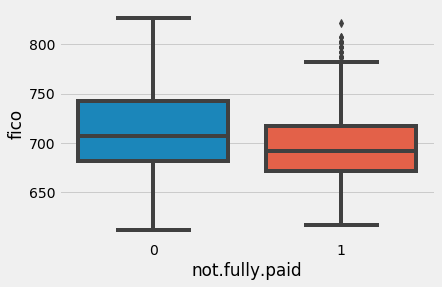

In [71]:
sns.boxplot(y=data['fico'], x=data['not.fully.paid']);

Dari hasil boxplot fico yang dibagi per kategori not.fully.paid di atas, terlihat bahwa tidak ada perbedaan nilai fico untuk yang membayar ataupun tidak membayar. Dari situ dapat dikatakan bahwa featire fico tidak mempengaruhi seseorang akan membayar atau tidak (not.fully.paid feature)

## 11.Apakah variable ‘purpose’ merupakan predictor yang potensial untuk memprediksi target? Jelaskan argumen anda.

Hint: Visualisasikan proporsi setiap kategori dalam variable ‘purpose’ terhadap target. Fungsi pd.crosstab akan membantu.


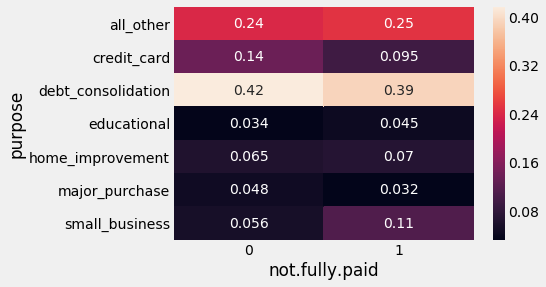

In [123]:
c = pd.crosstab(data['purpose'],data['not.fully.paid'],normalize='columns')
sns.heatmap(c, annot=True);

Dari hasil crosstab yang dibuat heatmap, dapat dilihat bahwa orang yang membayar penuh (0) Proporsinya Hampir sama dibandingkan dengan orang yang tidak membayar penuh. Dari kesimpulan itu dapat dikatakan bahwa prediktor 'purpose' tidak terlalu potential untuk memprediksi target

## 12. Berapa nilai rata-rata dari int.rate untuk purpose dengan kategori ‘credit_card’?

In [83]:
r = data[data['purpose']=='credit_card']['int.rate'].mean()
print('Nilai rata-rata dari int.rate untuk purpose dengan kategori "credit_card" sebesar, ',round(r,4))

Nilai rata-rata dari int.rate untuk purpose dengan kategori "credit_card" sebesar,  0.1197



## 13. Berapa jumlah kasus pinjaman yang nilai installment-nya di atas 200 dan tujuan pinjamannya untuk pendidikan (educational) ?


In [91]:
edu200 = len(data[(data['installment']>200) & (data['purpose']=='educational')])
print('Jumlah Kasus Pinjaman yang nilai installment-nya di atas 200 dan tujuan pinjamannya untuk pendidikan ada sebanyak',edu200)

Jumlah Kasus Pinjaman yang nilai installment-nya di atas 200 dan tujuan pinjamannya untuk pendidikan ada sebanyak 137


## 14. Tuliskan script untuk memfilter purpose =’credit_card’ dan simpan dalam dataframe yang disebut loans3.


In [94]:
loans3 = data[data['purpose']=='credit_card']
loans3.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
17,1,credit_card,0.0894,476.58,11.608236,7.07,797,6510.958333,7586,52.7,1,0,0,0
22,1,credit_card,0.1355,339.60,11.512925,7.94,662,1939.958333,21162,57.7,0,0,0,0


## 15. Siapkan data untuk pemodelan.





In [96]:
X = data.drop('not.fully.paid',1)
y = data['not.fully.paid']

### Ubah data kategorik menjadi dummy variabel.

In [97]:
X= pd.get_dummies(X)
X.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


### Buat dataframe baru bernama ‘final_data’ yang berisi seluruh features (numerik dan kategorik) dengan peubah kategorik yang sudah diubah menjadi dummy variabel.

In [99]:
final_data = X
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


## 16. Split final_data yang didapatkan dari soal sebelumnya menjadi data train dan data test. Proporsi data test adalah 0.30. Gunakan random_state = 101.


In [100]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_data,y,test_size = 0.3,random_state=101, stratify=y)

## 17. Buatlah sebuah instance DecisionTreeClassifier yang disebut ‘dtree’ dan buatlah model dari training data menggunakan dtree tersebut.


In [102]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## 18. Buatlah script untuk meprediksi target pada data test dengan menggunakan model yang telah dibuat sebelumnya, simpan dalam variable ‘predictions’


In [103]:
predictions = model.predict(X_test)

## 19. Tampilkan confusion matrix antara hasil prediksi dan target data test.


In [154]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix, recall_score, precision_score
print('Confusion Matrix')
cm = confusion_matrix(y_test, predictions)
print(confusion_matrix(y_test, predictions))

Confusion Matrix
[[1991  423]
 [ 354  106]]


## 20. Tampilkan ukuran kebaikan model, setidaknya nilai Akurasi, Sensitivity dan Specificity.

In [126]:
#####from confusion matrix calculate accuracy
total=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/total
print('Accuracy    : ', round(accuracy*100,2))

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', round(sensitivity*100,2))

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', round(specificity*100,2))



Accuracy    :  72.96
Sensitivity :  82.48
Specificity :  23.04


### ROC-AUC Curve, Precision and Recall

In [149]:
y_prob = model.predict_proba(X_test)

In [150]:
from sklearn.metrics import roc_curve

def plot_roc_curve(ytest, P_ensemble):
    """Plot the roc curve for base learners and ensemble."""
    plt.figure(figsize=(10, 8))
    plt.plot([0, 1], [0, 1], 'k--')

    fpr, tpr, _ = roc_curve(y_test, P_ensemble)
    plt.plot(fpr, tpr)
        
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.show()

Precision :
20.04
Recall :
23.04
AUC SCORE :
52.76


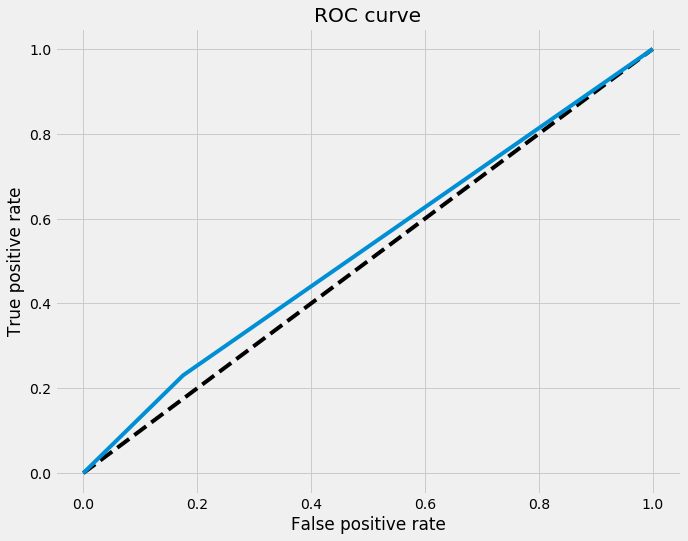

In [157]:
print('Precision :')
print(round(precision_score(y_test, predictions)*100,2))

print('Recall :')
print(round(recall_score(y_test, predictions)*100,2))

print('AUC SCORE :')
print(round(roc_auc_score(y_test, predictions)*100,2))
plot_roc_curve(y_test,y_prob[:,1])


Dari Hasil Evaluasi di atas, terlihat bahwa model decision tree yang dibuat masih blom baik untuk menduga kelas minoritas yaitu orang yang tidak membayar penuh. Model ini lebih cenderung memprediksi orang yang membayar penuh. Hal ini dikarenakan proporsi label target yang imbalance, sehingga nilai specificity nya termasuk kecil, yaitu sebesar 23,04%

#### Cara yang dapat digunakan untuk mengatasi masalah ini adalah :
1. Melakukan Feature Engineering dengan menambah feature-feature baru yang berpengaruh
2. Melakukan teknik Oversampling ataupun Undersampling untuk membuat proporsi labelnya seimbang
3. Mencoba Model Klasifikasi lain yang robust akan overfit seperti Random Forest, SVM, ataupun Extra Gradient Boosting

# Thanks
## Created By :
Fransdana Nadeak
<br>Data Scientist Bootcamp 
<br>PT Astra International